In [4]:
import numpy as np
import os
import librosa
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import StandardScaler



#in conda environment:
#*. Open appropriate anaconda prompt(according to environment) and try following commands inorder,

#First, conda install -c numba numba

#Then, conda install -c conda-forge librosa

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping

In [6]:
filelist_train = os.listdir('Train\Sound') 
filelist_test = os.listdir('DataSet\Test\LibriSpeech/test-other') 

train_df = pd.DataFrame(filelist_train)
test_df = pd.DataFrame(filelist_train)
val_df = pd.DataFrame(filelist_train)



In [ ]:
print(test_df)

                        0
0     116-288045-0000.wav
1     116-288045-0001.wav
2     116-288045-0002.wav
3     116-288045-0003.wav
4     1255-74899-0000.wav
..                    ...
127   8254-84205-0003.wav
128  8288-274150-0000.wav
129  8288-274150-0001.wav
130  8288-274150-0002.wav
131  8288-274150-0003.wav

[132 rows x 1 columns]


In [ ]:
# Renaming the column name to file
train_df = train_df.rename(columns={0:'file'})
test_df = test_df.rename(columns={0:'file'})
val_df  = val_df.rename(columns={0:'file'})

# Code in case we have to d0rop the '.DS_Store' and reset the index
train_df[train_df['file']=='.DS_Store']
train_df.drop(16, inplace=True)
train_df = train_df.sample(frac=1).reset_index(drop=True)

test_df[test_df['file']=='.DS_Store']
test_df.drop(16, inplace=True)
test_df = test_df.sample(frac=1).reset_index(drop=True)

val_df[val_df['file']=='.DS_Store']
val_df.drop(16, inplace=True)
val_df = val_df.sample(frac=1).reset_index(drop=True)

In [ ]:
# We create an empty list where we will append all the speakers ids for each row of our dataframe by slicing the file name since we know the id is the first number before the hash
speaker = []
for i in range(0, len(train_df)):
    speaker.append(train_df['file'][i].split('-')[0])
# We now assign the speaker to a new column 
train_df['speaker'] = speaker

speaker = []
for i in range(0, len(test_df)):
    speaker.append(test_df['file'][i].split('-')[0])
# We now assign the speaker to a new column 
test_df['speaker'] = speaker

speaker = []
for i in range(0, len(val_df)):
    speaker.append(val_df['file'][i].split('-')[0])
# We now assign the speaker to a new column 
val_df['speaker'] = speaker

In [ ]:
print(train_df.head())
print(test_df.head())
print(val_df.head())



                  file speaker
0  116-288045-0001.wav     116
1  6467-56885-0001.wav    6467
2  5543-27761-0003.wav    5543
3  6267-53049-0003.wav    6267
4  3915-57461-0002.wav    3915
                  file speaker
0  2506-11267-0000.wav    2506
1  4572-64670-0002.wav    4572
2  7641-96252-0002.wav    7641
3  5849-50873-0000.wav    5849
4   3660-6517-0003.wav    3660
                   file speaker
0  1686-142278-0000.wav    1686
1   700-122866-0003.wav     700
2  7601-101619-0001.wav    7601
3  7697-105815-0001.wav    7697
4   6599-38590-0002.wav    6599


In [ ]:
def extract_features(files):
    # Sets the name to be the path to where the file is in my computer
    file_name = os.path.join(os.path.abspath('Train\Sound')+'/'+str(files.file))
    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    # Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))
        # Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    # Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    # Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    # Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return (mfccs, chroma, mel, contrast, tonnetz)

In [ ]:
train_features = train_df.apply(extract_features, axis=1)
print(train_features)
print(train_features.shape)
print(len(train_features))

features_train = []
for i in range(0, len(train_features)):
    features_train.append(np.concatenate((
        train_features[i][0],
        train_features[i][1], 
        train_features[i][2], 
        train_features[i][3],
        train_features[i][4]), axis=0))

X_train = np.array(features_train)

C:\Users\alexp\AppData\Local\Temp/ipykernel_11444/4101981541.py:14: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\alexp\AppData\Local\Temp/ipykernel_11444/4101981541.py:14: FutureWarning: Pass y=[ 5.3577736e-04  5.3110434e-04  5.0618395e-04 ... -5.3354481e-05
 -3.5922482e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\alexp\AppData\Local\Temp/ipykernel_11444/4101981541.py:14: FutureWarning: Pass y=[0.00071092 0.00062416 0.00061333 ... 0.00025469 0.00010761 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\alexp\App

0      ([-391.58887, 85.51926, -35.641766, 69.40316, ...
1      ([-319.67322, 130.93184, -27.833958, 53.680176...
2      ([-342.20865, 108.39656, -42.896587, 46.982983...
3      ([-360.18707, 141.55319, 2.226124, 18.32943, 8...
4      ([-324.3658, 130.60352, -22.847261, 27.779747,...
                             ...                        
126    ([-382.4108, 131.61002, -6.6685514, 45.19346, ...
127    ([-365.9134, 138.79965, -9.779184, 30.111835, ...
128    ([-296.80908, 152.16954, -37.51124, 39.46862, ...
129    ([-313.27936, 143.13057, -33.476486, 40.252316...
130    ([-376.92303, 117.60607, -19.422657, 44.704502...
Length: 131, dtype: object
(131,)
131


In [ ]:
print(train_features[0])
print('-------------------------------------')
print(len(X_train[0]))

(array([-3.9158887e+02,  8.5519257e+01, -3.5641766e+01,  6.9403160e+01,
        3.4935245e-01,  3.2986138e+00, -9.3645344e+00,  2.9804237e+00,
       -1.0976827e+01, -1.0000422e+01,  3.0071962e+00, -7.3408608e+00,
        6.9908075e+00, -1.3534082e+01,  4.2676597e+00,  3.9300282e+00,
       -1.2045573e+01,  1.0593897e+00, -2.3472028e+00, -4.5447083e+00,
       -2.1118453e+00, -2.1777363e+00, -5.5983410e+00, -3.6417325e+00,
       -2.0417325e+00, -1.6410753e+00, -4.0030885e-01,  3.5896811e-01,
       -3.9213054e+00,  1.1039702e+00,  4.2143955e+00, -4.6093884e+00,
        1.9205515e+00,  3.9628272e+00, -7.4157476e-01,  1.2562568e+00,
        2.6140704e+00,  6.7148936e-01,  9.9292845e-01,  1.5261091e+00],
      dtype=float32), array([0.41210112, 0.47805107, 0.5286428 , 0.5585853 , 0.5380746 ,
       0.5833936 , 0.5692514 , 0.45947117, 0.41038296, 0.4807951 ,
       0.5405656 , 0.4338237 ], dtype=float32), array([3.64224873e-02, 2.14078967e-02, 1.65527016e-01, 7.22476423e-01,
       3.0013

In [ ]:
val_features = val_df.apply(extract_features, axis=1)

features_val = []
for i in range(0, len(val_features)):
    features_val.append(np.concatenate((
        val_features[i][0],
        val_features[i][1], 
        val_features[i][2], 
        val_features[i][3],
        val_features[i][4]), axis=0))

X_val = np.array(features_val)

C:\Users\alexp\AppData\Local\Temp/ipykernel_11444/4101981541.py:14: FutureWarning: Pass y=[0.00218935 0.00226908 0.00172    ... 0.00029525 0.00023319 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\alexp\AppData\Local\Temp/ipykernel_11444/4101981541.py:14: FutureWarning: Pass y=[ 0.0005451   0.00153135  0.00204929 ... -0.0051632  -0.00510599
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\alexp\AppData\Local\Temp/ipykernel_11444/4101981541.py:14: FutureWarning: Pass y=[-8.4069754e-05 -9.9346733e-05 -9.3263901e-05 ...  7.8056561e-05
  7.4828997e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspec

In [ ]:
test_features = test_df.apply(extract_features, axis=1)

features_test = []
for i in range(0, len(test_features)):
    features_test.append(np.concatenate((
        test_features[i][0],
        test_features[i][1], 
        test_features[i][2], 
        test_features[i][3],
        test_features[i][4]), axis=0))

X_test = np.array(features_test)

C:\Users\alexp\AppData\Local\Temp/ipykernel_11444/4101981541.py:14: FutureWarning: Pass y=[0.00291156 0.00354634 0.00324459 ... 0.00417334 0.00354661 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\alexp\AppData\Local\Temp/ipykernel_11444/4101981541.py:14: FutureWarning: Pass y=[ 0.00071076  0.00063302  0.0001178  ... -0.00365016 -0.00347486
 -0.00180119] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\alexp\AppData\Local\Temp/ipykernel_11444/4101981541.py:14: FutureWarning: Pass y=[-0.00015523 -0.0002562  -0.00014335 ... -0.00020582 -0.00018439
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=samp

In [ ]:
X_train = np.array(features_train)
y_train = np.array(train_df['speaker'])
y_val = np.array(val_df['speaker'])

In [ ]:

# Hot encoding y
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_val = to_categorical(lb.fit_transform(y_val))

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [ ]:
print(len(X_train[0]))
print(X_val)

193
[[-2.45672577  0.34843628  2.56691739 ... -2.02263299  1.01132746
  -1.05969085]
 [ 0.27375215 -0.99264884 -1.15137094 ... -0.52960774  0.11266248
  -0.64813028]
 [-1.01970781 -1.54699655  0.49222039 ... -0.29723398  0.02377313
   0.77114765]
 ...
 [ 0.44976512  0.95640131  0.7070791  ...  0.47348177 -0.89863632
   2.25227329]
 [ 0.3175832   1.15947135 -0.02569611 ...  0.70325187  0.21618295
  -0.22027038]
 [ 0.78925153  2.06058155  1.17738118 ...  0.26362992 -1.45418698
  -0.03152399]]


In [ ]:

# Build a simple dense model with early stopping and softmax for categorical classification, remember we have 30 classes
model = Sequential()
model.add(Dense(193, input_shape=(193,), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(33, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, epochs=100, 
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

Epoch 1/100
1/1 [==============================] - 1s 650ms/step - loss: 3.7340 - accuracy: 0.0382 - val_loss: 3.4293 - val_accuracy: 0.0611
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 3.6082 - accuracy: 0.0458 - val_loss: 3.3107 - val_accuracy: 0.0840
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 3.5013 - accuracy: 0.0153 - val_loss: 3.2004 - val_accuracy: 0.1679
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 3.3883 - accuracy: 0.0687 - val_loss: 3.0997 - val_accuracy: 0.2595
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 3.2294 - accuracy: 0.0992 - val_loss: 3.0048 - val_accuracy: 0.4046
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 3.1387 - accuracy: 0.1145 - val_loss: 2.9136 - val_accuracy: 0.5267
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 3.0845 - accuracy: 0.1527 - val_loss: 2.8251 - val_accuracy: 0.6107
Epoch 8/100
1/1 [==

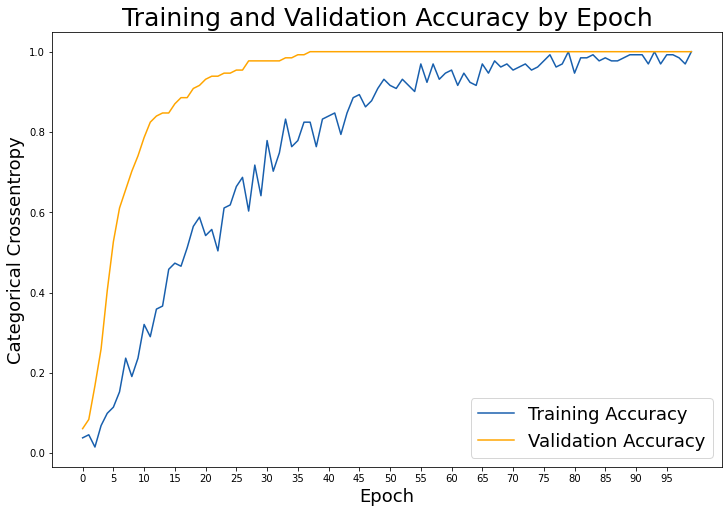

In [ ]:
import matplotlib.pyplot as plt

# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
# Set figure size.
plt.figure(figsize=(12, 8))
# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))
plt.legend(fontsize = 18)

In [ ]:
import torch
torch.save(history, "network.pth")

INFO:tensorflow:Assets written to: ram://261d21fd-000b-4426-a164-7644805896fd/assets


In [ ]:
X_test

array([[ 0.13157009, -0.26497185,  0.7001318 , ...,  0.12981009,
         0.01179952, -1.48441463],
       [ 1.43600176,  1.83738136, -0.72886371, ...,  0.67206995,
        -0.34283367,  1.04416448],
       [ 0.51990674,  0.63742881,  0.69143861, ..., -0.41401817,
        -0.31256937,  1.02241748],
       ...,
       [-0.66874593, -0.02063602, -1.32372025, ...,  1.75517292,
        -1.69810081, -1.65710364],
       [ 0.57428067, -0.4589163 , -0.88296123, ...,  0.74487059,
        -1.02614853,  0.24665305],
       [ 0.20641518, -0.46408803,  0.28476801, ...,  0.8111739 ,
        -0.05162536, -0.04629661]])

In [ ]:
predictions = model.predict(X_test)
print(predictions)

[[5.40914480e-10 3.67892525e-08 2.45114817e-10 ... 2.89817420e-10
  5.41294287e-10 2.07096407e-09]
 [5.65284388e-08 3.54571057e-06 2.85414148e-06 ... 4.17512183e-07
  2.67802193e-07 8.58862313e-06]
 [1.03540378e-05 9.61469979e-08 9.78491016e-07 ... 7.31552120e-07
  1.53800956e-05 5.82422672e-07]
 ...
 [1.47299647e-06 3.92192788e-07 2.96683112e-07 ... 4.66947029e-07
  9.99250948e-01 2.30760193e-07]
 [1.44727392e-05 6.66438382e-07 1.71544525e-06 ... 1.62631238e-07
  7.95343203e-06 3.91437140e-07]
 [1.19741355e-08 9.13845270e-07 1.60645468e-05 ... 1.71051383e-07
  3.39158833e-05 1.61799526e-05]]


No handles with labels found to put in legend.


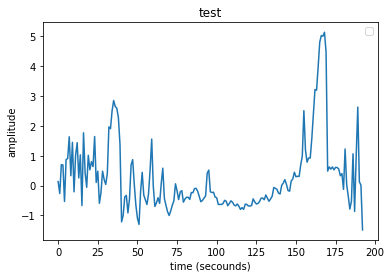

No handles with labels found to put in legend.


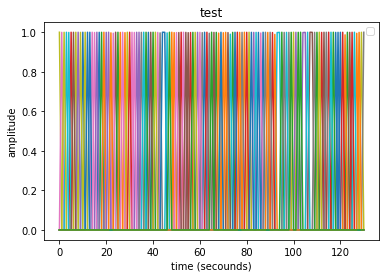

In [ ]:
plt.title("test")
plt.xlabel("time (secounds)")
plt.ylabel("amplitude")
plt.plot(X_test[0])
plt.legend()
plt.show()

plt.title("test")
plt.xlabel("time (secounds)")
plt.ylabel("amplitude")
plt.plot(predictions)
plt.legend()
plt.show()



No handles with labels found to put in legend.


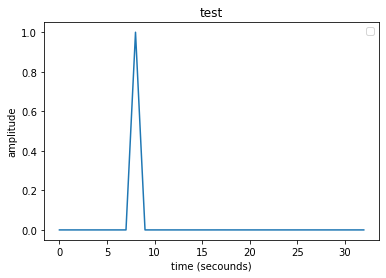

8


In [ ]:
index = 0
plt.title("test")
plt.xlabel("time (secounds)")
plt.ylabel("amplitude")
plt.plot(predictions[index])
plt.legend()
plt.show()

print(np.argmax(predictions[index]))

In [ ]:
test_df


,file,speaker
0,2506-11267-0000.wav,2506
1,4572-64670-0002.wav,4572
2,7641-96252-0002.wav,7641
3,5849-50873-0000.wav,5849
4,3660-6517-0003.wav,3660
...,...,...
126,5849-50873-0003.wav,5849
127,3915-57461-0000.wav,3915
128,8254-84205-0002.wav,8254
129,5543-27761-0002.wav,5543
